In [1]:
import sys
sys.path.append("..")

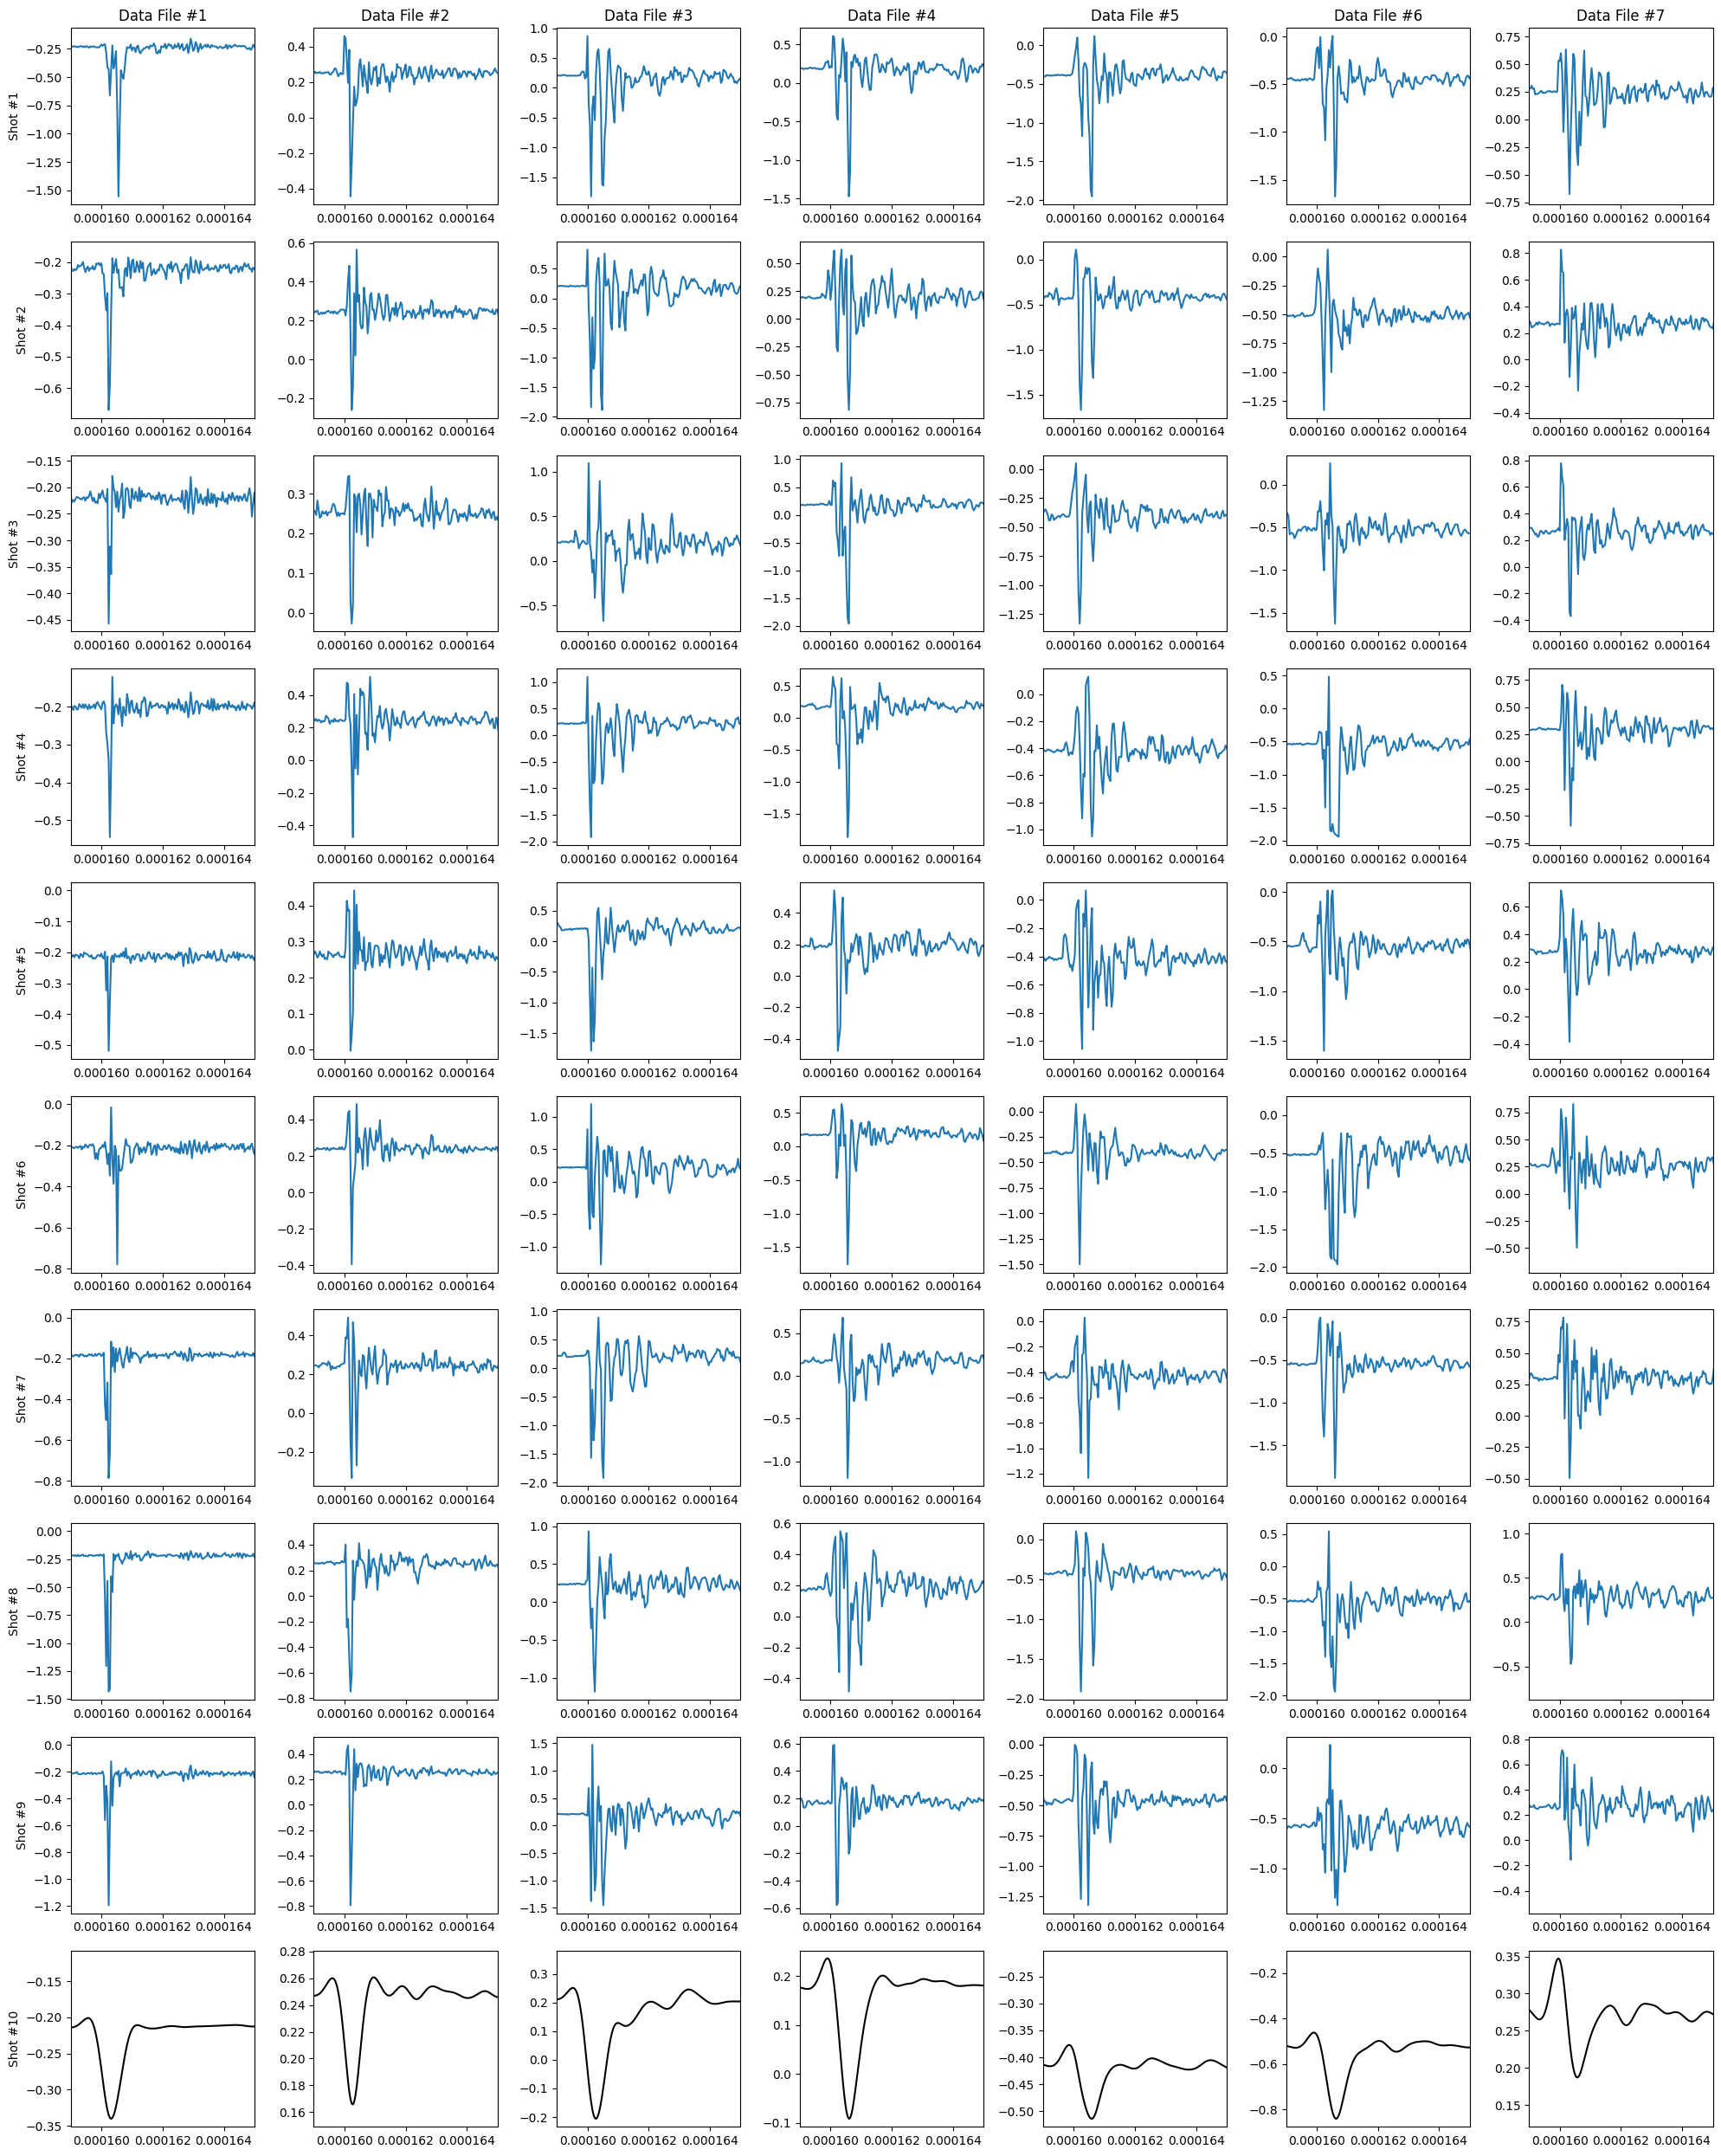

In [6]:
import analysis 
import matplotlib.pyplot as plt

s = analysis.System("sagnac", ["../../data/20240430/underwater_ablation_" + str(i + 1) + "cm/iter_0.tdms" for i in range(7)], channel = "Y")

fig, ax = plt.subplots(len(s.get_data()[0].collection), len(s.get_data()), figsize = (20, 25))
for i, d in enumerate(s.get_data()):
    ax[0][i].set_title("Data File #" + str(i + 1))
    for j in range(len(d.collection)):
        if i == 0:
            ax[j][0].set_ylabel("Shot #" + str(j + 1))
        # ALL DATA FILES
        # ax[j][i].set_xlim([0.000159, 0.000165]) 
        # first signal! This is obviously the albation's initial sound passing the detector arm

        # DF = 0
        # ax[j][0].set_xlim([0.000170, 0.000175]) 
        # second signal: this is a prominent feature in the signal. Based on its arrival time, and 
        # relatively small amplitude, I assume that this may be reflection from the aluminum plate
        # sitting about 7 cm from the front wall of the tank. This means that there should be around
        # ~ 1.5 cm between the wall and the Al block. Estimated time of travel = 1.01351e-5. This 
        # actually seems to be close to accurate here
        # ax[j][0].set_xlim([0.000175, 0.0002]) 
        # "third signal": I put this in quotes because there is actually many more than just one signal in this section. 
        # I believe that these signals are most likely reflections that have occured with the perpendicular walls to the
        # detection arm and possibly the gap between the back wall and the block. They seem to be small in amplitude and 
        # somewhat periodic in their occurences. 
        # ax[j][0].set_xlim([0.0002, 0.00021]) 
        # "fourth signal": there are quite a few interesting low amplitude signals here. The most prominent of these
        # lies somewhat in the middle of this time range.
        # Multiple other reflections? During the rest of the trace, there are other signals to be analyzed.
        
        # DF = 1

        # DF = 2

        # DF = 3

        # DF = 4

        # DF = 5

        # DF = 6
        # ax[j][i].set_xlim([0.000165, 0.0002]) 
        ax[j][i].set_xlim([0.000159, 0.000165]) 
        
        if j < len(d.collection[1:]):
            ax[j][i].plot(d.collection[j + 1].t, d.collection[j + 1].x)
        else:
            d.apply("lowpass", cutoff = 1e6, inplace = True)
            d.apply("bin_average", Npts = int(d.r / 2e6 * 2))
            d.aggrigate(collection_slice = slice(1, len(d.collection[1:]), 1))
            ax[j][i].plot(d.agg.t, d.agg.x, c = "k")
    s.set_data([], ind = i)
fig.tight_layout()